# Bank Marketing

## Contexto

Una institución financiera busca una mejora en la efectividad de sus campañas de marketing, la cual ha disminuido de 12% a 8% en los últimos seis meses.



## Objetivo

Predecir qué clientes tienen mayor probabilidad de aceptar una campaña de marketing y extraer insights accionables para futuras campañas.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [14]:
df = pd.read_csv(r"C:\Users\Julio\Documents\Python\BankMarketing_Julio_Sedano\BankMarketing.csv", delimiter=';')

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Descripción de las variables

El dataset contiene variables demográficas, financieras, de campaña y macroeconómicas
que permiten analizar el comportamiento de los clientes frente a campañas de marketing bancario.


In [16]:
print("Dimensiones del dataset (filas, columnas):", df.shape)

Dimensiones del dataset (filas, columnas): (41188, 21)


In [17]:
print("Información general del dataset:")
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17

In [18]:
print("Resumen estadístico de las variables numéricas:")
display(df.describe().T)

Resumen estadístico de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [19]:
variables_numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
variables_categoricas = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

Variables numéricas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Distribución de la variable target 'y':
y
no     36548
yes     4640
Name: count, dtype: int64

Porcentajes:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4278552746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


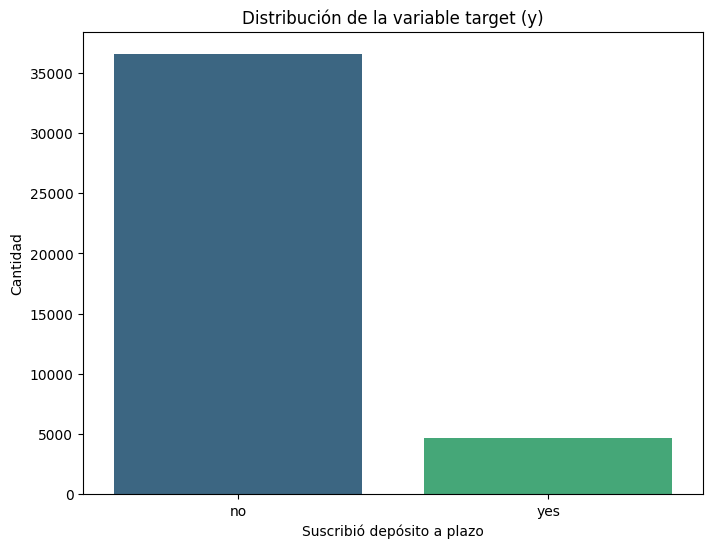

In [20]:
print("Distribución de la variable target 'y':")
print(df['y'].value_counts())
print(f"\nPorcentajes:")
print(df['y'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribución de la variable target (y)')
plt.xlabel('Suscribió depósito a plazo')
plt.ylabel('Cantidad')
plt.show()

# Codificación de la variable target para análisis numérico
df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})

A partir de la gráfica se analiza la distribución de la variable objetivo `y` para evaluar el nivel de desbalance del dataset. Se observa que la mayoría de los clientes no aceptan la campaña, lo que indica una baja tasa de efectividad. Posteriormente, la variable target se codifica en formato numérico para su uso en modelos de machine learning.


In [21]:
diccionario_datos = pd.DataFrame({
    "Columna": df.columns,
    "Tipo de Dato": df.dtypes.values,
    "Valores Únicos": df.nunique().values,
    "Nulos (%)": (df.isnull().mean().values * 100).round(2)
})
display(diccionario_datos)

,Columna,Tipo de Dato,Valores Únicos,Nulos (%)
0,age,int64,78,0.0
1,job,object,12,0.0
2,marital,object,4,0.0
3,education,object,8,0.0
4,default,object,3,0.0
5,housing,object,3,0.0
6,loan,object,3,0.0
7,contact,object,2,0.0
8,month,object,10,0.0
9,day_of_week,object,5,0.0


Se construye un diccionario de datos para validar los tipos de variables, la presencia de valores nulos y la cardinalidad de cada columna, con el objetivo de preparar el dataset para la etapa de modelado.

In [23]:
duplicados = df.duplicated().sum()
print(f'Se encontraron {duplicados} duplicados')

Se encontraron 12 duplicados


In [24]:
if duplicados > 0:
    df.drop_duplicates(inplace=True)
    print(f"Se eliminaron {duplicados} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")

Se eliminaron 12 filas duplicadas.


Se identificaron 12 registros duplicados en el dataset, los cuales fueron eliminados con el objetivo de evitar posibles sesgos en el análisis y garantizar que cada observación represente un registro único.

In [26]:
df['contact_frequency'] = df['campaign'] + df['previous']
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 100], labels=['Joven', 'Adulto joven', 'Adulto', 'Adulto mayor'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded,contact_frequency,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Adulto
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Adulto
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Adulto joven
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Adulto joven
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1,Adulto mayor
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,1,Adulto
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,2,Adulto
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1,Adulto joven


Se crearon nuevas variables derivadas con el objetivo de mejorar la interpretabilidad del análisis y capturar patrones relevantes para el negocio. En particular, se agruparon las edades en rangos representativos y se construyó una variable que resume la frecuencia total de contacto con el cliente.

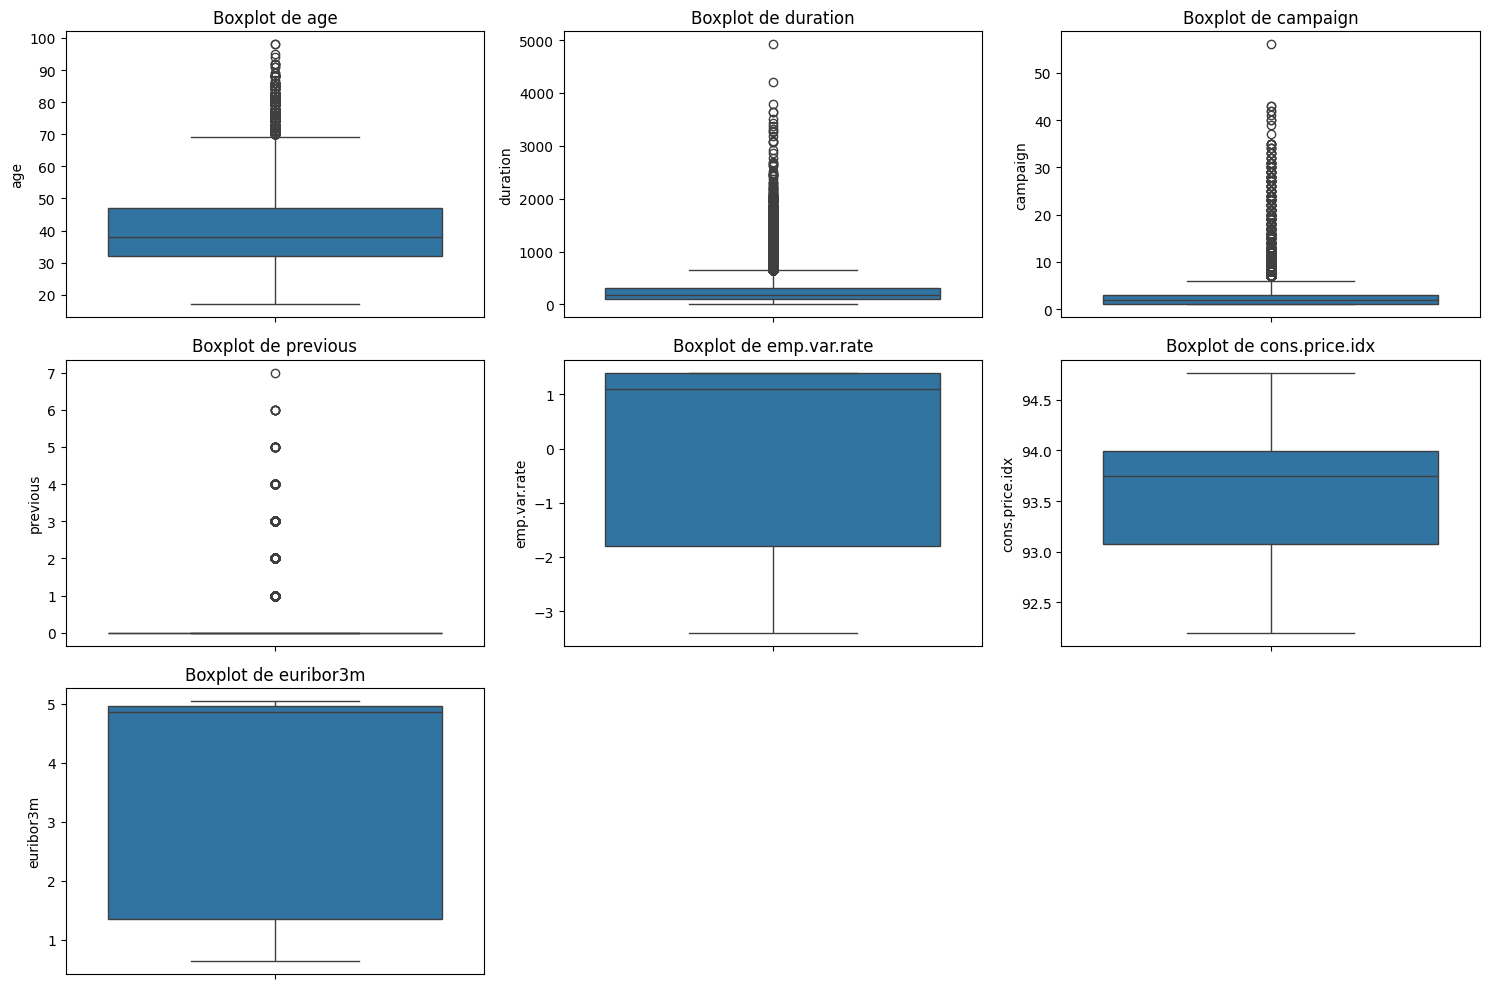

In [27]:
numeric_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Se analizó la distribución de las variables numéricas mediante boxplots con el objetivo de identificar posibles valores atípicos. 

In [ ]:
from scipy import stats
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers

for col in numeric_cols:
    outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
    outliers_z = detect_outliers_zscore(df, col)
    
    print(f"\n--- {col} ---")
    print(f"Límites IQR: [{lower:.2f}, {upper:.2f}]")
    print(f"Número de outliers (IQR): {len(outliers_iqr)} ({len(outliers_iqr)/len(df)*100:.2f}%)")
    print(f"Número de outliers (Z-Score >3): {len(outliers_z)} ({len(outliers_z)/len(df)*100:.2f}%)")


--- age ---
Límites IQR: [9.50, 69.50]
Número de outliers (IQR): 468 (1.14%)
Número de outliers (Z-Score >3): 369 (0.90%)

--- duration ---
Límites IQR: [-223.50, 644.50]
Número de outliers (IQR): 2963 (7.20%)
Número de outliers (Z-Score >3): 861 (2.09%)

--- campaign ---
Límites IQR: [-2.00, 6.00]
Número de outliers (IQR): 2406 (5.84%)
Número de outliers (Z-Score >3): 869 (2.11%)

--- previous ---
Límites IQR: [0.00, 0.00]
Número de outliers (IQR): 5625 (13.66%)
Número de outliers (Z-Score >3): 1064 (2.58%)

--- emp.var.rate ---
Límites IQR: [-6.60, 6.20]
Número de outliers (IQR): 0 (0.00%)
Número de outliers (Z-Score >3): 0 (0.00%)

--- cons.price.idx ---
Límites IQR: [91.70, 95.37]
Número de outliers (IQR): 0 (0.00%)
Número de outliers (Z-Score >3): 0 (0.00%)

--- euribor3m ---
Límites IQR: [-4.08, 10.39]
Número de outliers (IQR): 0 (0.00%)
Número de outliers (Z-Score >3): 0 (0.00%)


Se observó que para variables como `duration`, `campaign` y `previous`, los métodos tradicionales de detección de outliers (IQR y boxplot) producen límites no interpretables desde el punto de vista del negocio (valores negativos). Esto se debe a la fuerte asimetría y a la naturaleza discreta de dichas variables, por lo que los valores extremos no se consideran errores sino comportamientos reales.


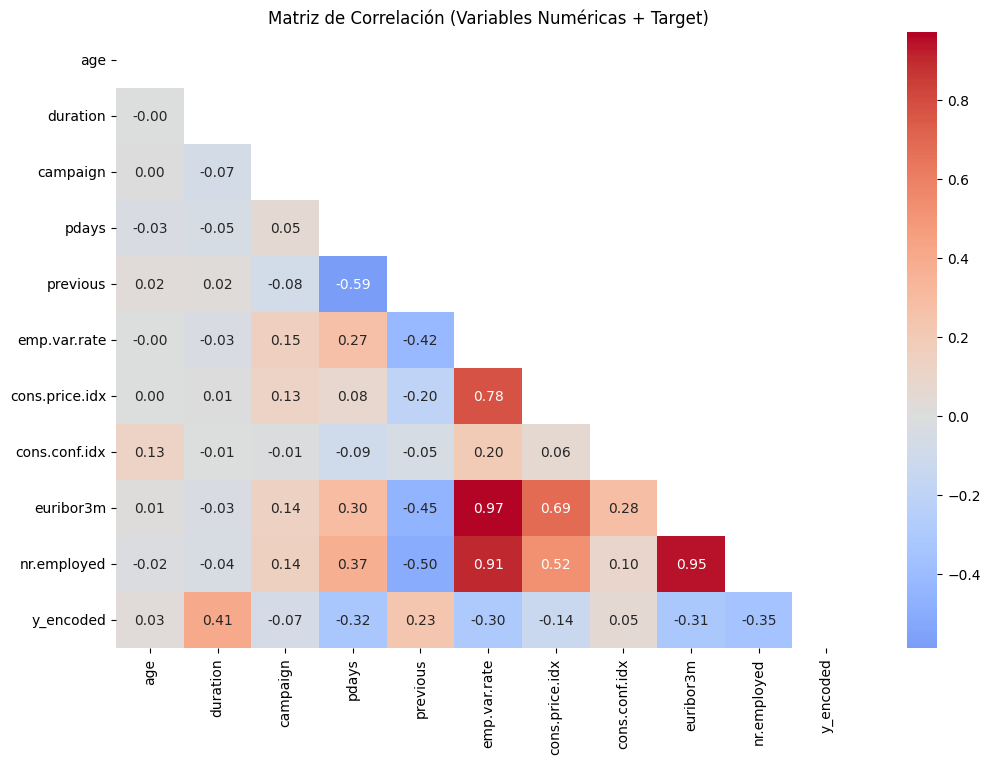

In [33]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[variables_numericas + ['y_encoded']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask, fmt='.2f')
plt.title('Matriz de Correlación (Variables Numéricas + Target)')
plt.show()

El análisis de correlación muestra que la variable `duration` presenta la relación
más fuerte con la variable objetivo, lo cual es esperable debido a que una mayor
duración de la llamada suele reflejar mayor interés del cliente. Sin embargo, esta
variable no será utilizada en el modelo predictivo debido a que representa
información conocida solo después del contacto (data leakage).

Otras variables como `campaign` y `previous` presentan correlaciones negativas,
sugiriendo que un mayor número de intentos de contacto podría reducir la probabilidad
de aceptación de la campaña.

In [34]:
target_correlations = correlation_matrix['y_encoded'].abs().sort_values(ascending=False)
print("\nCorrelaciones con la variable target:")
print(target_correlations[1:6])


Correlaciones con la variable target:
duration        0.405297
nr.employed     0.354669
pdays           0.324948
euribor3m       0.307740
emp.var.rate    0.298289
Name: y_encoded, dtype: float64


Este análisis permite identificar qué variables numéricas presentan mayor relación con la variable objetivo, sirviendo como apoyo para la selección de variables y la interpretación del comportamiento de los clientes.


Variable categórica: job


,Conteo,Porcentaje (%)
job,,
admin.,10419,25.30
blue-collar,9253,22.47
technician,6739,16.37
services,3967,9.63
management,2924,7.10
retired,1718,4.17
entrepreneur,1456,3.54
self-employed,1421,3.45
housemaid,1060,2.57


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


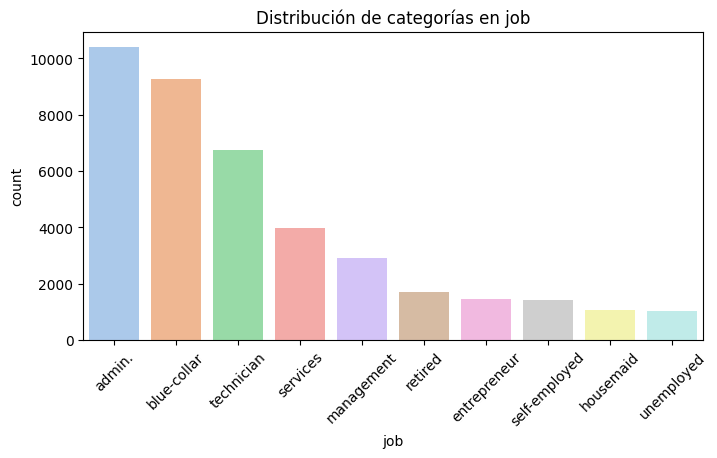


Variable categórica: marital


,Conteo,Porcentaje (%)
marital,,
married,24921,60.52
single,11564,28.08
divorced,4611,11.20
unknown,80,0.19


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


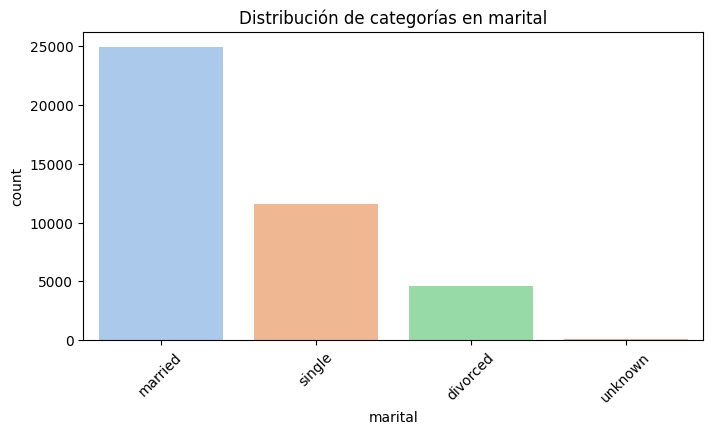


Variable categórica: education


,Conteo,Porcentaje (%)
education,,
university.degree,12164,29.54
high.school,9512,23.10
basic.9y,6045,14.68
professional.course,5240,12.73
basic.4y,4176,10.14
basic.6y,2291,5.56
unknown,1730,4.20
illiterate,18,0.04


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


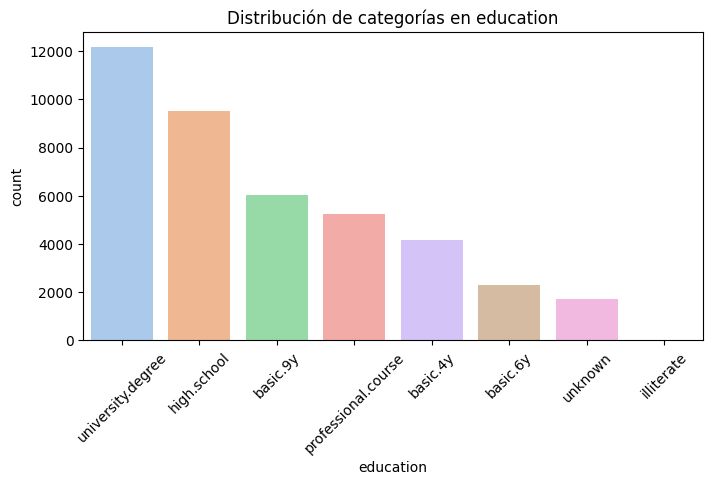


Variable categórica: default


,Conteo,Porcentaje (%)
default,,
no,32577,79.12
unknown,8596,20.88
yes,3,0.01


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


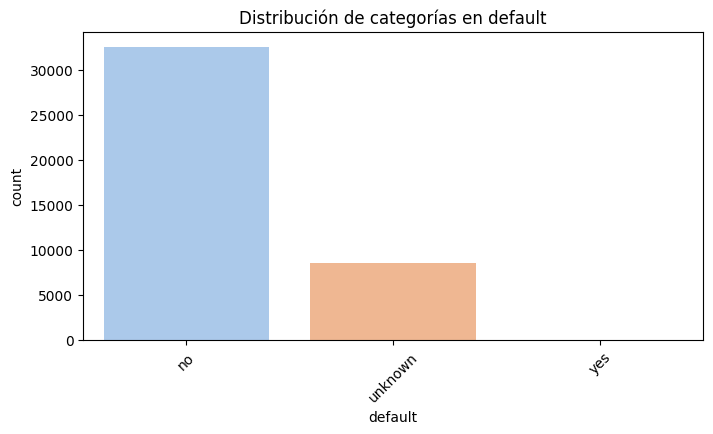


Variable categórica: housing


,Conteo,Porcentaje (%)
housing,,
yes,21571,52.39
no,18615,45.21
unknown,990,2.40


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


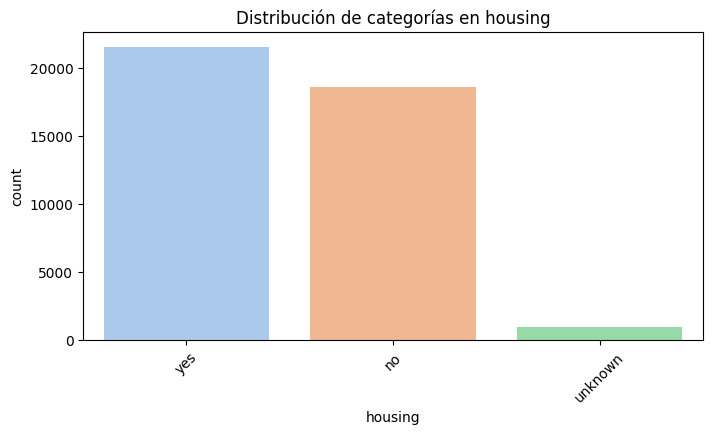


Variable categórica: loan


,Conteo,Porcentaje (%)
loan,,
no,33938,82.42
yes,6248,15.17
unknown,990,2.40


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


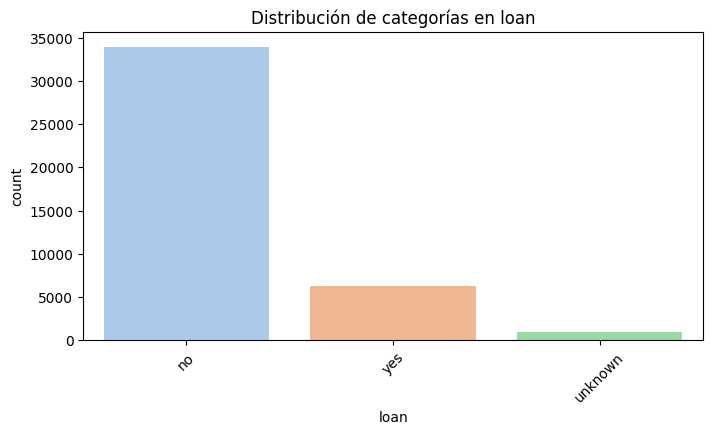


Variable categórica: contact


,Conteo,Porcentaje (%)
contact,,
cellular,26135,63.47
telephone,15041,36.53


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


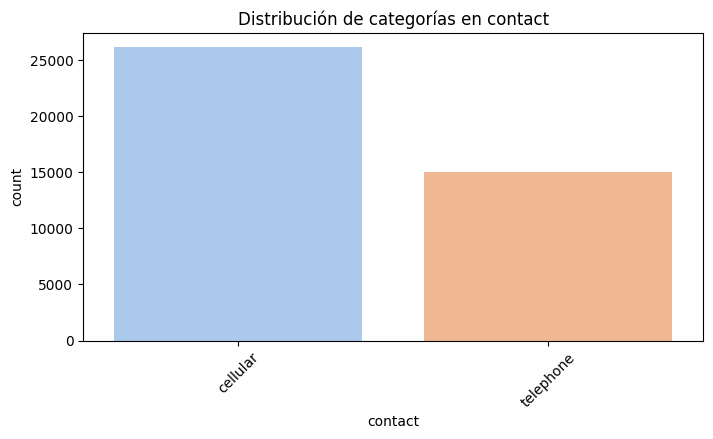


Variable categórica: month


,Conteo,Porcentaje (%)
month,,
may,13767,33.43
jul,7169,17.41
aug,6176,15.00
jun,5318,12.92
nov,4100,9.96
apr,2631,6.39
oct,717,1.74
sep,570,1.38
mar,546,1.33


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


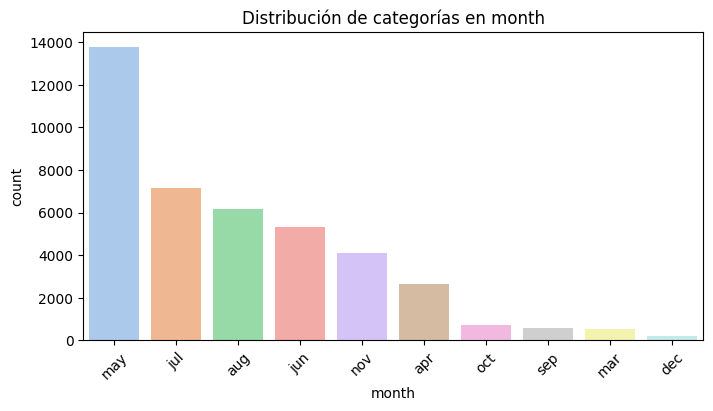


Variable categórica: day_of_week


,Conteo,Porcentaje (%)
day_of_week,,
thu,8618,20.93
mon,8512,20.67
wed,8134,19.75
tue,8086,19.64
fri,7826,19.01


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


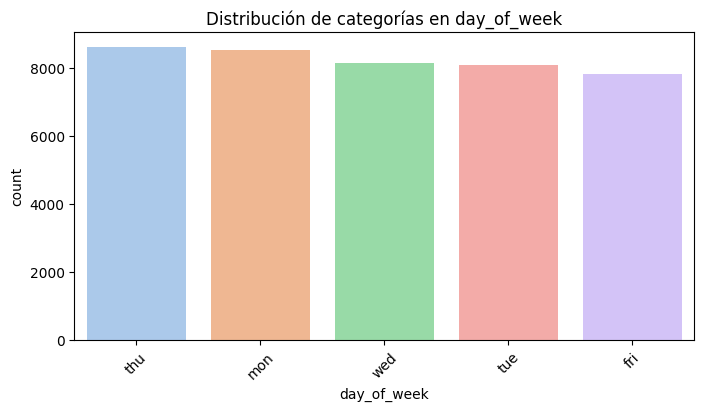


Variable categórica: poutcome


,Conteo,Porcentaje (%)
poutcome,,
nonexistent,35551,86.34
failure,4252,10.33
success,1373,3.33


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


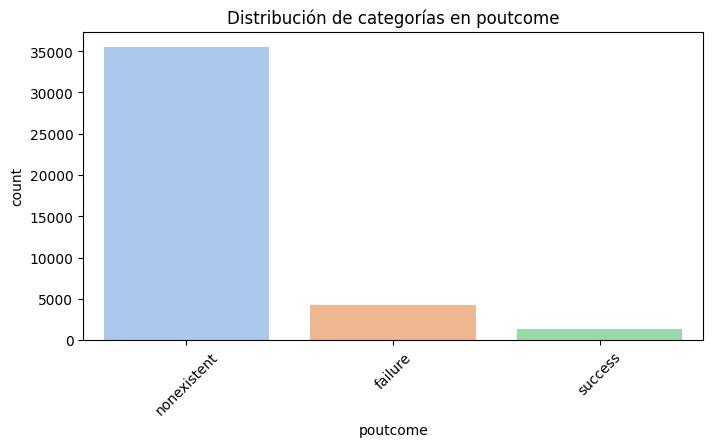


Variable categórica: y


,Conteo,Porcentaje (%)
y,,
no,36537,88.73
yes,4639,11.27


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2799050309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")


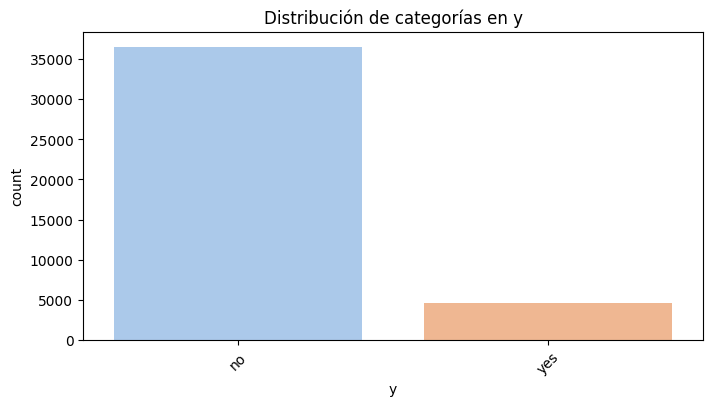

In [35]:
for col in variables_categoricas:
    print(f"\nVariable categórica: {col}")
    conteos = df[col].value_counts()
    proporciones = df[col].value_counts(normalize=True) * 100
    
    resumen_cat = pd.DataFrame({
        "Conteo": conteos,
        "Porcentaje (%)": proporciones.round(2)
    })
    
    display(resumen_cat.head(10))
    
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=conteos.index[:10], palette="pastel")
    plt.title(f"Distribución de categorías en {col}")
    plt.xticks(rotation=45)
    plt.show()

Se analiza la distribución de las variables categóricas para identificar las categorías más frecuentes y posibles desbalances.

In [42]:
def cramers_v(x, y):
    tabla = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(tabla)[0]
    n = tabla.sum().sum()
    phi2 = chi2/n
    r,k = tabla.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_results = {}
for col in variables_categoricas:
    if col != 'y':
        cramers_results[col] = cramers_v(df[col], df['y'])

# Convertir a DataFrame y ordenar
cramers_df = (
    pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramérs_V'])
    .sort_values(by='Cramérs_V', ascending=False)
)
cramers_df

,Cramérs_V
poutcome,0.320448
month,0.274123
job,0.151955
contact,0.144612
default,0.099123
education,0.067183
marital,0.053976
day_of_week,0.023143
housing,0.009533
loan,0.000000


Los valores de Cramér’s V fueron ordenados de mayor a menor con el fin de identificar las variables categóricas con mayor asociación con la variable objetivo `y` y facilitar la selección de características para el modelado.

C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\2672187568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


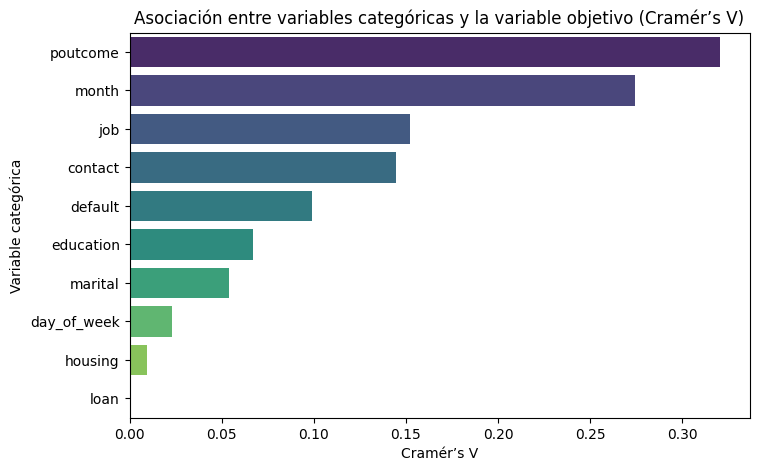

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=cramers_df['Cramérs_V'],
    y=cramers_df.index,
    palette='viridis'
)
plt.title("Asociación entre variables categóricas y la variable objetivo (Cramér’s V)")
plt.xlabel("Cramér’s V")
plt.ylabel("Variable categórica")
plt.show()

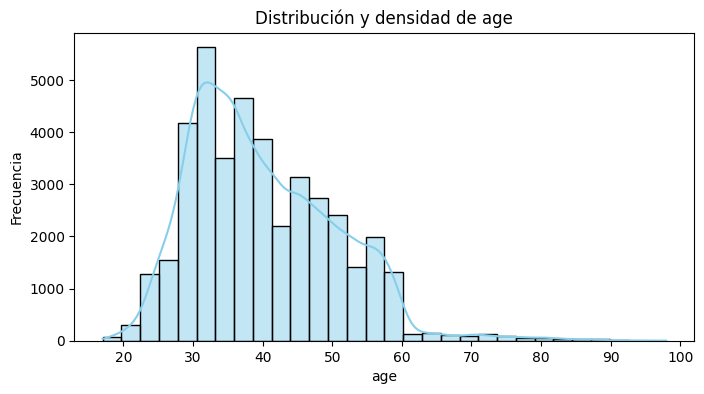

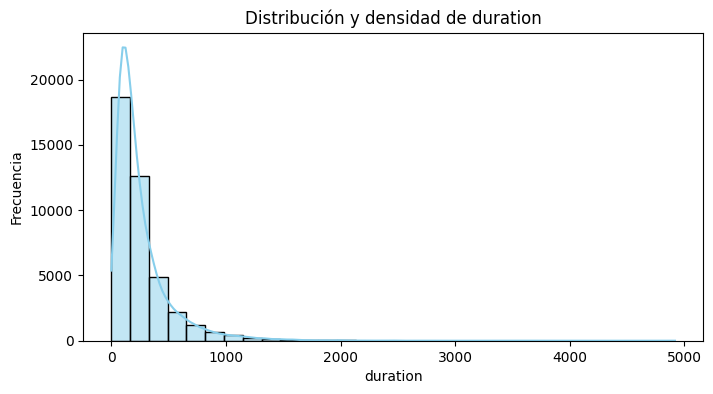

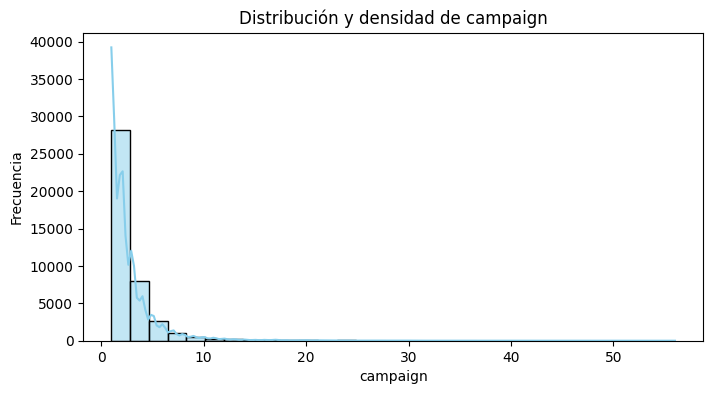

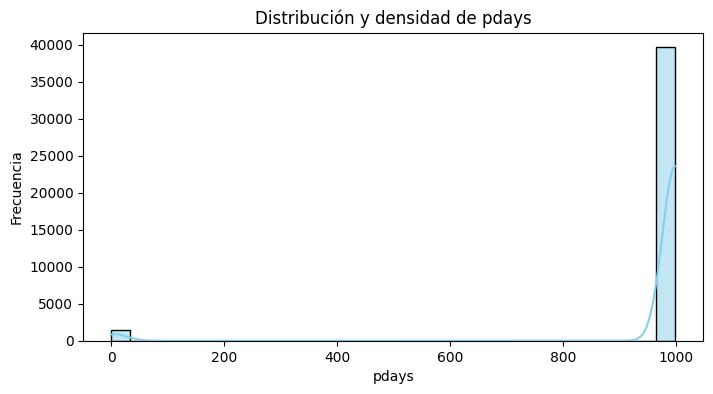

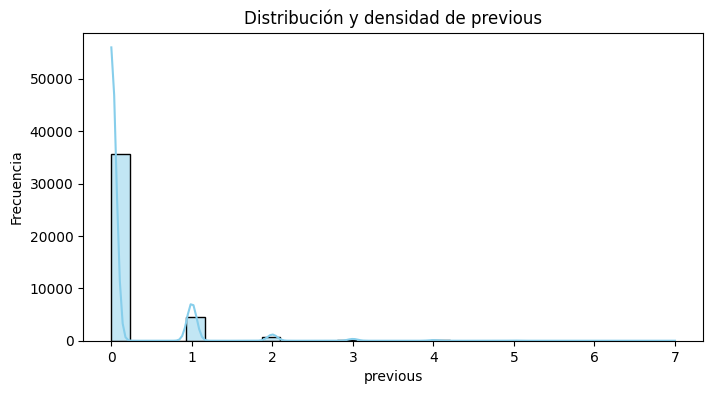

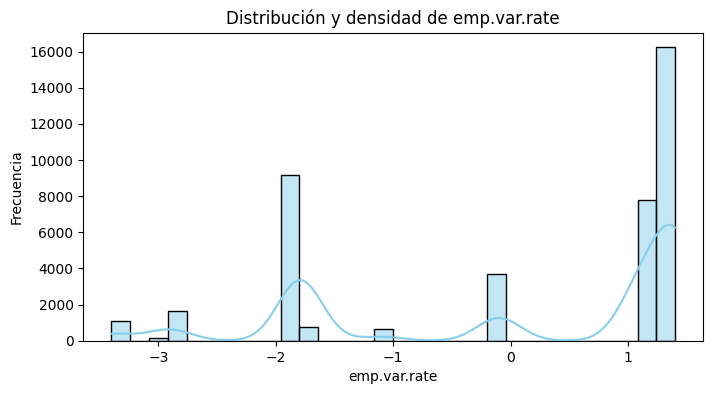

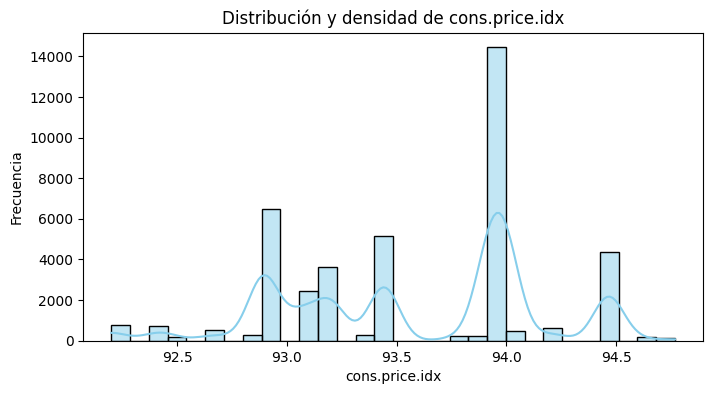

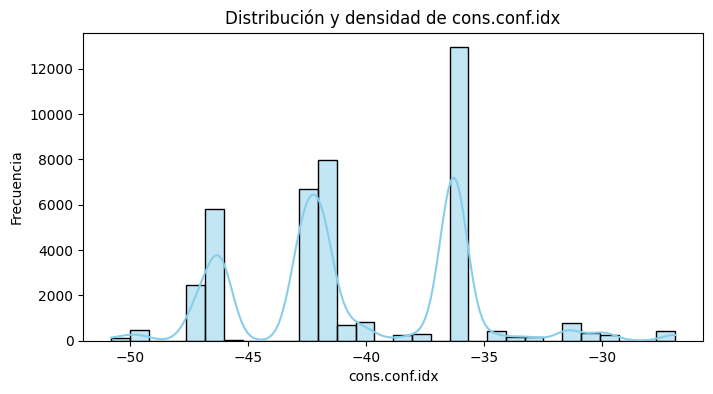

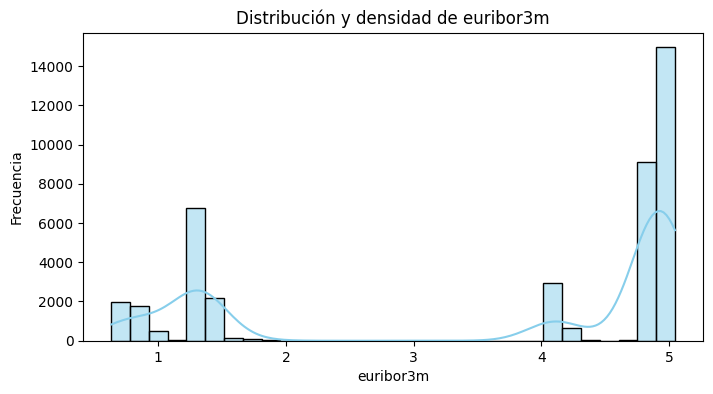

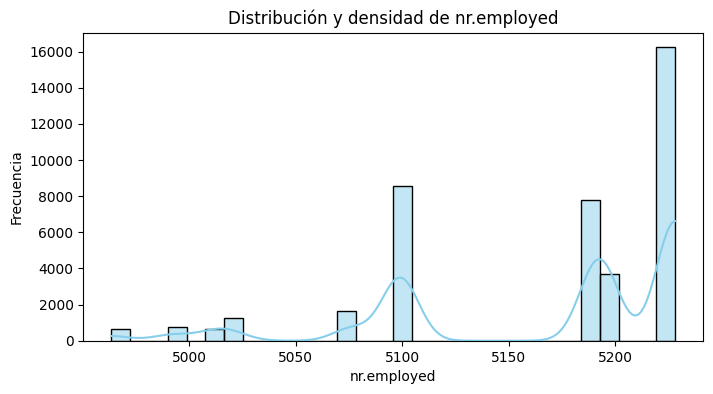

In [45]:
for col in variables_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución y densidad de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

El análisis visual de las distribuciones muestra que varias variables numéricas presentan asimetría y colas largas, especialmente aquellas relacionadas con el número de contactos y la duración de las llamadas.


ANÁLISIS TEMPORAL


C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4089471814.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4089471814.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_conversion = df.groupby('month')['y_encoded'].mean()
C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4089471814.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_conversion.index, y=month_convers

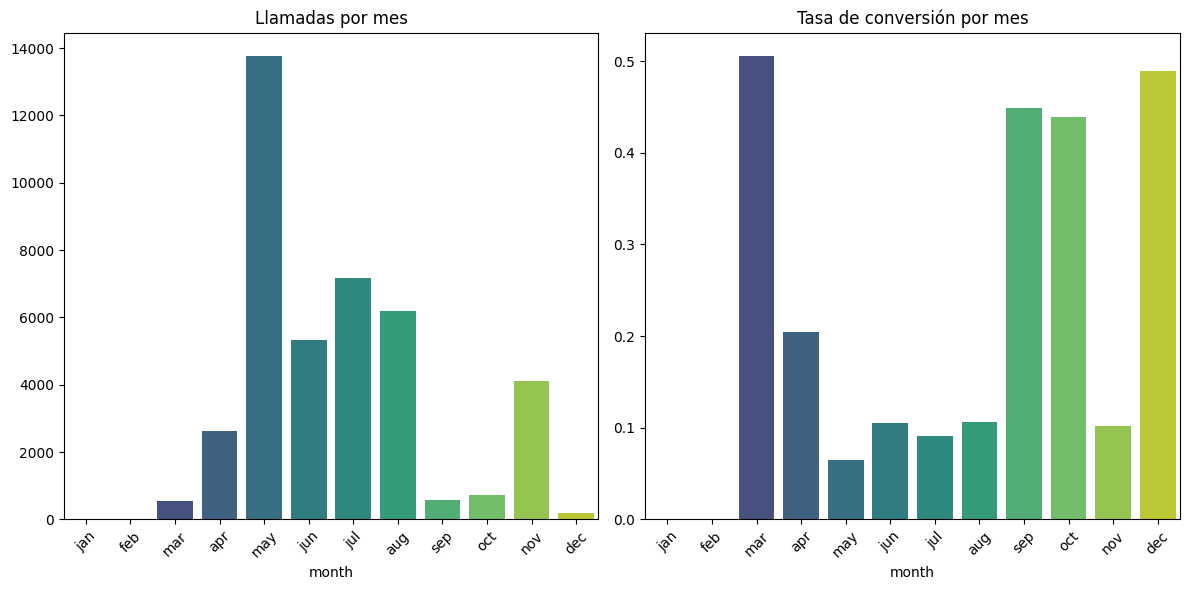

C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4089471814.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4089471814.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_conversion = df.groupby('day_of_week')['y_encoded'].mean()
C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\4089471814.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_conversion.index, y=day_conversion.

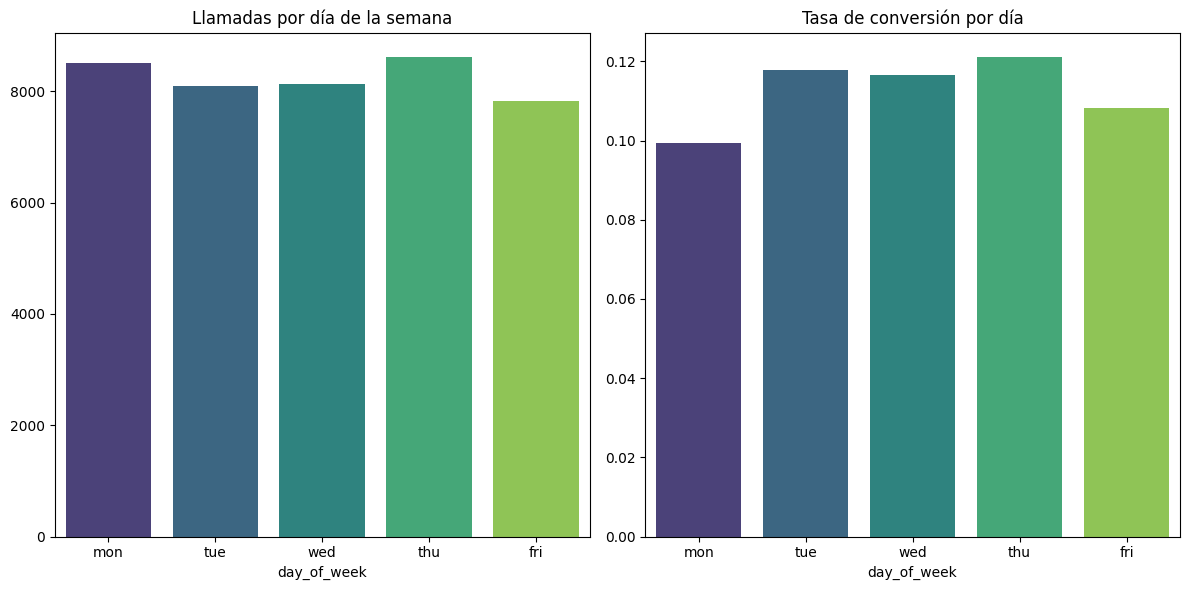

In [46]:
print("\n" + "="*50)
print("ANÁLISIS TEMPORAL")
print("="*50)
df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})
# Análisis por mes
if 'month' in df.columns:
    month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    month_counts = df['month'].value_counts().sort_index()
    sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
    plt.title('Llamadas por mes')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    month_conversion = df.groupby('month')['y_encoded'].mean()
    sns.barplot(x=month_conversion.index, y=month_conversion.values, palette='viridis')
    plt.title('Tasa de conversión por mes')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Análisis por día de la semana
if 'day_of_week' in df.columns:
    day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
    df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    day_counts = df['day_of_week'].value_counts().sort_index()
    sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
    plt.title('Llamadas por día de la semana')
    
    plt.subplot(1, 2, 2)
    day_conversion = df.groupby('day_of_week')['y_encoded'].mean()
    sns.barplot(x=day_conversion.index, y=day_conversion.values, palette='viridis')
    plt.title('Tasa de conversión por día')
    
    plt.tight_layout()
    plt.show()


El análisis temporal muestra una clara estacionalidad tanto en el volumen de contactos como en la tasa de conversión. Se observa que los meses con mayor cantidad de llamadas no necesariamente coinciden con aquellos con mayor efectividad, lo que sugiere oportunidades de optimización en la planificación de las campañas.

Asimismo, el análisis por día de la semana indica variaciones en la tasa de aceptación, lo que podría ser utilizado para priorizar los días con mayor probabilidad de conversión y mejorar la eficiencia operativa

In [47]:
# Asociación de contact_frequency con y (Spearman)
from scipy.stats import spearmanr

corr, p = spearmanr(df['contact_frequency'], df['y_encoded'])
print(f"Spearman contact_frequency vs y: corr={corr:.3f}, p={p:.4f}")


Spearman contact_frequency vs y: corr=0.018, p=0.0002


Aunque la correlación de Spearman entre `contact_frequency` y la variable objetivo resulta estadísticamente significativa (p < 0.05), el valor de la correlación es prácticamente nulo (corr = 0.018), lo que indica que el número total de contactos no presenta una relación relevante con la probabilidad de aceptación de la campaña.

In [49]:
cramer_age = cramers_v(df['age_group'], df['y'])
print(f"Cramér’s V entre 'age_group' e 'y': {cramer_age:.3f}")

Cramér’s V entre 'age_group' e 'y': 0.177


La variable `age_group` presenta una asociación moderada con la variable objetivo, lo que indica que la probabilidad de aceptación varía de forma relevante entre los distintos grupos etarios. Con esta información vamos a tener una representación más interpretable del efecto de la edad.

C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\3040878751.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='viridis')
C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\3040878751.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conversion = df.groupby('age_group')['y_encoded'].mean()
C:\Users\Julio\AppData\Local\Temp\ipykernel_13220\3040878751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_conversion.index, y=age_conversion.values, palette='vi

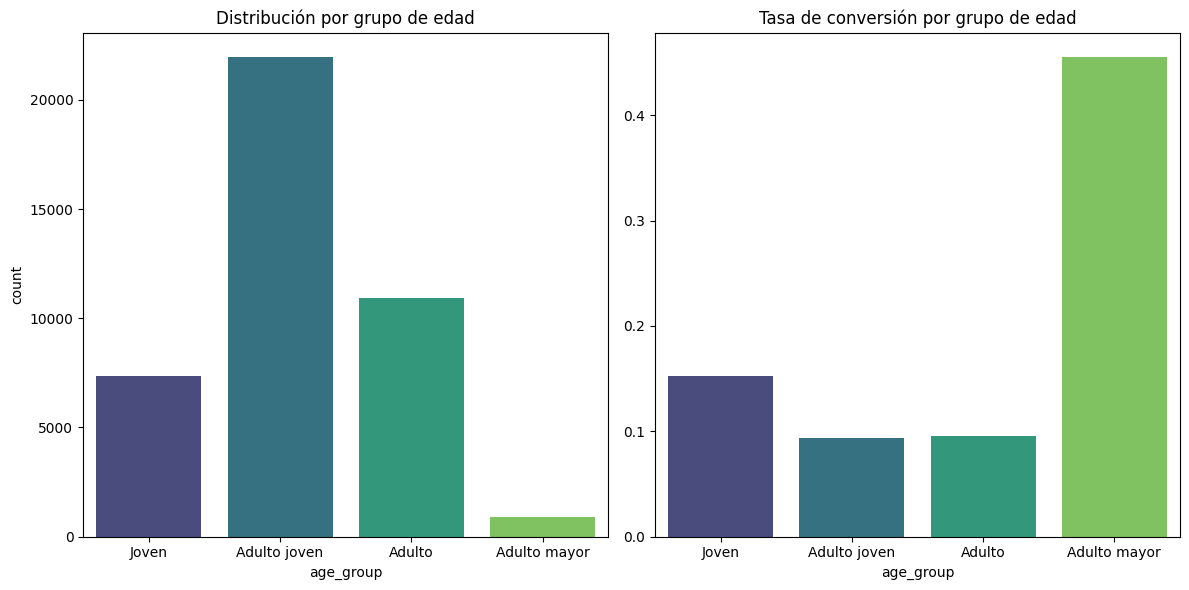

In [50]:
if 'age_group' in df.columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='age_group', data=df, palette='viridis')
    plt.title('Distribución por grupo de edad')
    
    plt.subplot(1, 2, 2)
    age_conversion = df.groupby('age_group')['y_encoded'].mean()
    sns.barplot(x=age_conversion.index, y=age_conversion.values, palette='viridis')
    plt.title('Tasa de conversión por grupo de edad')
    
    plt.tight_layout()
    plt.show()

El análisis por grupos etarios muestra que los clientes jóvenes presentan una mayor tasa de conversión en comparación con los grupos de edad intermedios. Asimismo, el grupo de adultos mayores exhibe una tasa de aceptación elevada; sin embargo, dado el reducido tamaño de esta población, este resultado debe interpretarse con cautela.

En contraste, los grupos de adultos jóvenes y adultos concentran la mayor parte de los contactos, pero muestran tasas de conversión más bajas, lo que sugiere oportunidades de optimización en la segmentación de campañas.

In [55]:
print("\n" + "="*50)
print("RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO")
print("="*50)

print(f"Tamaño final del dataset: {df.shape}")
print(f"Tasa de conversión global: {df['y_encoded'].mean()*100:.2f}%")

excluded_vars = ['y_encoded', 'duration']
top_num = (
    correlation_matrix['y_encoded']
    .abs()
    .drop(labels=excluded_vars, errors='ignore')
    .sort_values(ascending=False)
    .head(5)
)

print("\nTop 5 variables numéricas más relacionadas con el target:")
for var, corr in top_num.items():
    print(f"- {var}: {corr:.3f}")

print("\nTop 5 variables categóricas más asociadas al target:")
for var, val in cramers_df.head(5)['Cramérs_V'].items():
    print(f"- {var}: {val:.3f}")



RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO
Tamaño final del dataset: (41176, 25)
Tasa de conversión global: 11.27%

Top 5 variables numéricas más relacionadas con el target:
- nr.employed: 0.355
- pdays: 0.325
- euribor3m: 0.308
- emp.var.rate: 0.298
- previous: 0.230

Top 5 variables categóricas más asociadas al target:
- poutcome: 0.320
- month: 0.274
- job: 0.152
- contact: 0.145
- default: 0.099


El resumen del análisis exploratorio permite identificar las variables con mayor relación con la variable objetivo. Con base en estos resultados, se seleccionan las cinco variables numéricas y categóricas más relevantes para el modelado, priorizando claridad e interpretabilidad.


## Conclusiones y Recomendaciones Estratégicas

El análisis exploratorio revela una tasa de conversión global baja (≈11%), con un fuerte desbalance de clases. Se identificaron patrones claros asociados al perfil demográfico, el canal de contacto y factores temporales. Variables como `month`, `poutcome`, `job` y `age_group` mostraron una relación significativa con la aceptación de la campaña.

**Insights principales:**
- Los clientes jóvenes y adultos mayores presentan mayores tasas de conversión, aunque el grupo de adultos mayores debe interpretarse con cautela por su bajo tamaño muestral.
- El contacto vía celular muestra mayor efectividad que otros canales.
- Existen meses con alta estacionalidad positiva (marzo, septiembre, diciembre).
- Variables macroeconómicas desfavorables están asociadas a menores tasas de conversión.

**Recomendaciones estratégicas:**
- Priorizar campañas dirigidas a segmentos con mayor probabilidad de conversión.
- Optimizar el calendario de contacto según estacionalidad.
- Limitar el número de intentos de contacto por cliente.
- Monitorear indicadores económicos antes de lanzar campañas masivas.

Estas conclusiones sirven como base para el desarrollo de modelos predictivos que permitan priorizar clientes con alta probabilidad de aceptación y mejorar la eficiencia de futuras campañas.